In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

**Para la Galleta Control a 20 °C**

In [2]:
ruta="https://raw.githubusercontent.com/YolandaDonis/Temas-Selectos-IQ/refs/heads/main/Datos%20Proyecto%20Yolanda_Duviel.csv"

In [3]:
df=pd.read_csv(ruta)
df.head()

,Fecha,Peso(g),aw (LiCl),Peso(g).1,aw (Na2SO4),Peso(g).2,aw (CH3COOK),Peso(g).3,aw (Mg(NO3)2),Peso(g).4,aw (CuCl),Peso(g).5,aw (K2CO3),Peso(g).6,aw (NaCl),Peso(g).7,aw (KCl)
0,2024-09-29,3.70,0.114,3.30,0.243,3.53,0.423,3.00,0.479,3.11,0.652,3.53,0.658,3.29,0.689,3.97,0.731
1,2024-09-30,3.71,0.124,3.31,0.241,3.53,0.416,3.04,0.475,3.18,0.651,3.62,0.656,3.34,0.683,4.01,0.717
2,2024-10-01,3.71,0.124,3.31,0.241,3.55,0.416,3.07,0.472,3.20,0.650,3.62,0.656,3.35,0.680,4.01,0.717
3,2024-10-02,3.72,0.120,3.32,0.240,3.56,0.417,3.06,0.475,3.23,0.650,3.65,0.654,3.35,0.680,4.03,0.715
4,2024-10-03,3.71,0.120,3.32,0.240,3.57,0.417,3.07,0.470,3.23,0.649,3.65,0.655,3.36,0.679,4.03,0.715


In [4]:
df["Fecha"]=pd.to_datetime(df["Fecha"])
df=df.set_index("Fecha")
df.head()

,Peso(g),aw (LiCl),Peso(g).1,aw (Na2SO4),Peso(g).2,aw (CH3COOK),Peso(g).3,aw (Mg(NO3)2),Peso(g).4,aw (CuCl),Peso(g).5,aw (K2CO3),Peso(g).6,aw (NaCl),Peso(g).7,aw (KCl)
Fecha,,,,,,,,,,,,,,,,
2024-09-29,3.70,0.114,3.30,0.243,3.53,0.423,3.00,0.479,3.11,0.652,3.53,0.658,3.29,0.689,3.97,0.731
2024-09-30,3.71,0.124,3.31,0.241,3.53,0.416,3.04,0.475,3.18,0.651,3.62,0.656,3.34,0.683,4.01,0.717
2024-10-01,3.71,0.124,3.31,0.241,3.55,0.416,3.07,0.472,3.20,0.650,3.62,0.656,3.35,0.680,4.01,0.717
2024-10-02,3.72,0.120,3.32,0.240,3.56,0.417,3.06,0.475,3.23,0.650,3.65,0.654,3.35,0.680,4.03,0.715
2024-10-03,3.71,0.120,3.32,0.240,3.57,0.417,3.07,0.470,3.23,0.649,3.65,0.655,3.36,0.679,4.03,0.715


In [5]:
Xwi= 0.015

sales = {'LiCl':     {'aw': 'aw (LiCl)',     'peso': 'Peso(g)'},
    'Na2SO4':   {'aw': 'aw (Na2SO4)',   'peso': 'Peso(g).1'},
    'CH3COOK':  {'aw': 'aw (CH3COOK)',  'peso': 'Peso(g).2'},
    'Mg(NO3)2': {'aw': 'aw (Mg(NO3)2)', 'peso': 'Peso(g).3'},
    'CuCl':     {'aw': 'aw (CuCl)',     'peso': 'Peso(g).4'},
    'K2CO3':    {'aw': 'aw (K2CO3)',    'peso': 'Peso(g).5'},
    'NaCl':     {'aw': 'aw (NaCl)',     'peso': 'Peso(g).6'},
    'KCl':      {'aw': 'aw (KCl)',      'peso': 'Peso(g).7'},}


In [6]:
filas = []

for sal, cols in sales.items():
    aw = df.iloc[0][cols['aw']]       # aw primera fecha
    Pi = df.iloc[0][cols['peso']]     # peso inicial
    Pf = df.iloc[-1][cols['peso']]    # peso final

    We = ((Pi * Xwi) + (Pf - Pi)) / (Pi * (1 - Xwi)) #fórmula para la humedad

    filas.append({
        'Sal': sal,
        'aw': aw,
        'P_inicial': Pi,
        'P_final': Pf,
        'Xwi (g H2O/g galleta)': Xwi,
        'We (g H2O/g SS)': We})               #definiendo cada fila

In [7]:
tabla_2=pd.DataFrame(filas)
tabla_2

,Sal,aw,P_inicial,P_final,Xwi (g H2O/g galleta),We (g H2O/g SS)
0,LiCl,0.114,3.70,3.76,0.015,0.031692
1,Na2SO4,0.243,3.30,3.38,0.015,0.039840
2,CH3COOK,0.423,3.53,3.68,0.015,0.058368
3,Mg(NO3)2,0.479,3.00,3.18,0.015,0.076142
4,CuCl,0.652,3.11,3.41,0.015,0.113160
5,K2CO3,0.658,3.53,3.90,0.015,0.121640
6,NaCl,0.689,3.29,3.67,0.015,0.132489
7,KCl,0.731,3.97,4.48,0.015,0.145648


In [8]:
promedio_aw = tabla_2.filter(like='aw').values.mean() #promedio de la actividad de agua
print(promedio_aw)

0.498625


In [33]:
promedio_We = tabla_2.filter(like='We (g H2O/g SS)').values.mean() #promedio de We
print(promedio_We)

0.08987251785072786


In [10]:
desv_aw = tabla_2.filter(like='aw').values.std(ddof=1) #desviación estandar de la actividad de agua
print(desv_aw)

0.22632147647602008


In [34]:
desv_We = tabla_2.filter(like='We (g H2O/g SS)').values.std(ddof=1) #desviación estandar de We
print(desv_We)

0.04399335846478965


In [12]:
varianza_aw = tabla_2.filter(like='aw').values.var(ddof=1) #varianza de la actividad del agua
print(varianza_aw)

0.051221410714285716


In [32]:
varianza_We = tabla_2.filter(like='We (g H2O/g SS)').values.var(ddof=1) #varianza de We
print(varianza_We)

0.001935415589011479


In [14]:
aw = tabla_2.filter(like='aw') #rango de la actividad de agua

rango_aw = aw.values.max() - aw.values.min()
print(rango_aw)

0.617


In [35]:
We = tabla_2.filter(like='We (g H2O/g SS)') #rango de We

rango_We = We.values.max() - We.values.min()
print(rango_We)

0.11395660898915017


In [36]:
cv_aw = (tabla_2['aw'].std(ddof=1) / tabla_2['aw'].mean()) * 100 #coeficiente de variacion de la actividad del agua
print(cv_aw)

45.38911536245075


In [37]:
cv_We = (tabla_2['We (g H2O/g SS)'].std(ddof=1) / tabla_2['We (g H2O/g SS)'].mean()) * 100 #coeficiente de variacion de We
print(cv_We)

48.95084672920771


**Construcción de las isotermas**



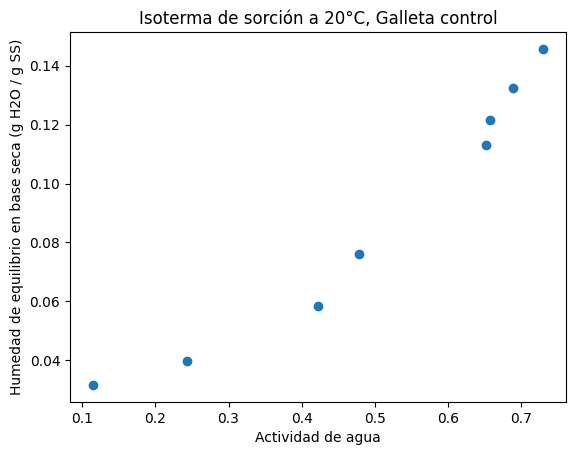

In [39]:
plt.figure()
plt.scatter(tabla_2['aw'],tabla_2["We (g H2O/g SS)"])
plt.xlabel('Actividad de agua')
plt.ylabel('Humedad de equilibrio en base seca (g H2O / g SS)')
plt.title('Isoterma de sorción a 20°C, Galleta control')
plt.show()


Modelo de sorción para la isoterma de BET

* 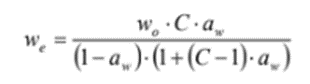

Modelo linealizado
* 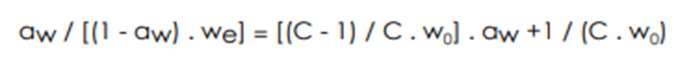

In [19]:
tabla_2['aw/[(1-aw)*We]'] = (tabla_2['aw'] /
    ((1 - tabla_2['aw']) * tabla_2['We (g H2O/g SS)']))

tabla_modelo_BET = tabla_2[[
    'aw',
    'We (g H2O/g SS)',
    'aw/[(1-aw)*We]']]
tabla_modelo_BET

,aw,We (g H2O/g SS),aw/[(1-aw)*We]
0,0.114,0.031692,4.060010
1,0.243,0.039840,8.057323
2,0.423,0.058368,12.559907
3,0.479,0.076142,12.074600
4,0.652,0.113160,16.556700
5,0.658,0.121640,15.816912
6,0.689,0.132489,16.721664
7,0.731,0.145648,18.657780


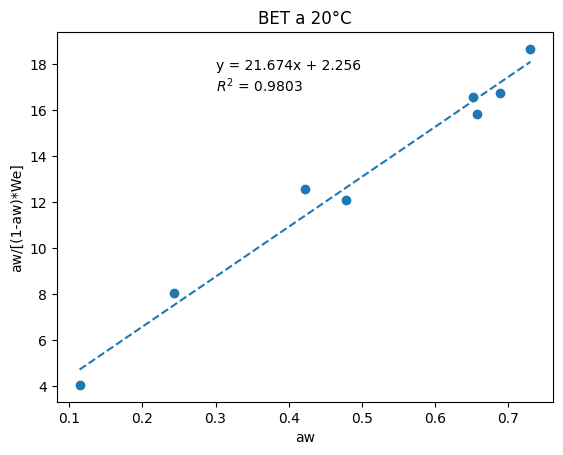

In [20]:
#tabla con eL ajuste lineal

x = tabla_modelo_BET['aw'].values
y = tabla_modelo_BET['aw/[(1-aw)*We]'].values

m, b = np.polyfit(x, y, 1)
y_fit = m * x + b

#Coeficiente de determinación R²
y_mean = np.mean(y)
ss_tot = np.sum((y - y_mean)**2)
ss_res = np.sum((y - y_fit)**2)

R2 = 1 - (ss_res / ss_tot)

plt.figure()
plt.scatter(x, y)
plt.plot(x, y_fit, linestyle='--')
plt.xlabel('aw')
plt.ylabel('aw/[(1-aw)*We]')
plt.title('BET a 20°C')

# Texto con ecuación y R²
plt.text(0.30,
    max(y)*0.9,
    f'y = {m:.3f}x + {b:.3f}\n$R^2$ = {R2:.4f}',
    fontsize=10)
plt.show()


In [21]:
#calculando los parámetros de BET

C = 1 + (m / b)
W0 = 1 / (C*b)


print(f"W0 (monocapa) = {W0:.4f} g H2O / g SS")
print(f"C (constante BET) = {C:.2f}")


W0 (monocapa) = 0.0418 g H2O / g SS
C (constante BET) = 10.61


In [22]:
parametros_BET = pd.DataFrame({
    'Parámetro': ['W0', 'C'],
    'Valor': [W0, C]})
parametros_BET


,Parámetro,Valor
0,W0,0.041789
1,C,10.607214


In [23]:
tabla_2['We_BET'] = (W0*C*tabla_2['aw'] )/((1 - tabla_2['aw']) * (1+(C*tabla_2['aw'])-tabla_2['aw']))

tabla_We_BET = tabla_2[[
    'aw',
    'We_BET']]
tabla_We_BET

,aw,We_BET
0,0.114,0.027221
1,0.243,0.042671
2,0.423,0.064172
3,0.479,0.072749
4,0.652,0.114330
5,0.658,0.116482
6,0.689,0.128885
7,0.731,0.150140


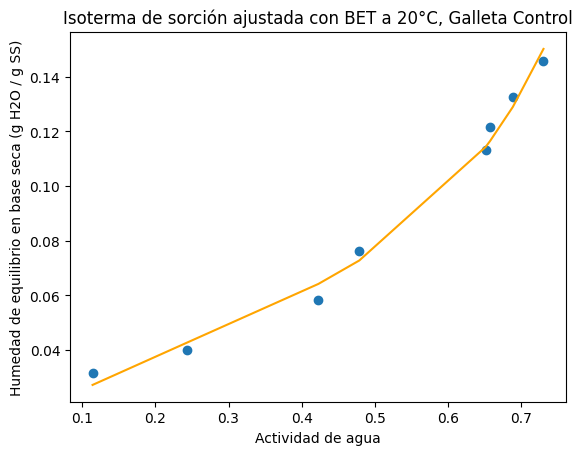

In [40]:
#comprobando el ajuste del modelo de BET respecto a los datos experimentales

plt.figure()
plt.scatter(tabla_2['aw'],tabla_2["We (g H2O/g SS)"])
plt.plot(tabla_We_BET['aw'],tabla_We_BET["We_BET"], color="orange")
plt.xlabel('Actividad de agua')
plt.ylabel('Humedad de equilibrio en base seca (g H2O / g SS)')
plt.title('Isoterma de sorción ajustada con BET a 20°C, Galleta Control')

plt.show()

Modelo de GAB
* 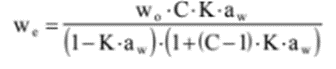

Modelo Polinomio cuadrado
* 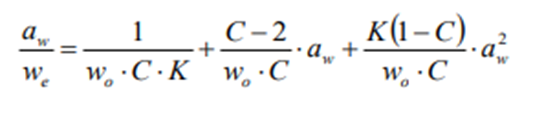

In [25]:
tabla_2['aw/We'] = (tabla_2['aw']) / (tabla_2['We (g H2O/g SS)'])

tabla_modelo_GAB = tabla_2[[
    'aw',
    'We (g H2O/g SS)',
    'aw/We']]
tabla_modelo_GAB

,aw,We (g H2O/g SS),aw/We
0,0.114,0.031692,3.597169
1,0.243,0.039840,6.099394
2,0.423,0.058368,7.247067
3,0.479,0.076142,6.290867
4,0.652,0.113160,5.761731
5,0.658,0.121640,5.409384
6,0.689,0.132489,5.200438
7,0.731,0.145648,5.018943


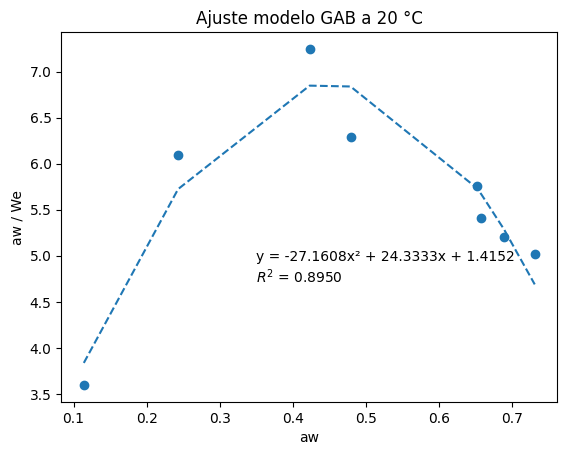

In [26]:
#ajuste cuadrático del modelo de GAB

x = tabla_modelo_GAB['aw'].values
y = tabla_modelo_GAB['aw/We'].values

a, b, c = np.polyfit(x, y, 2)
y_GAB = a*x**2 + b*x + c

y_mean = np.mean(y)
ss_res = np.sum((y - y_GAB)**2)
ss_tot = np.sum((y - y_mean)**2)
R2 = 1 - ss_res/ss_tot
plt.figure()

plt.scatter(x, y)
plt.plot(x, y_GAB, linestyle='--')
plt.xlabel('aw')
plt.ylabel('aw / We')
plt.title('Ajuste modelo GAB a 20 °C')
plt.text(0.35,
    max(y)*0.65,
    f'y = {a:.4f}x² + {b:.4f}x + {c:.4f}\n$R^2$ = {R2:.4f}',
    fontsize=10)
plt.show()


In [27]:
from scipy.optimize import curve_fit

def GAB(aw, W0, C, K):
    return (W0 * C * K * aw) / (
        (1 - K * aw) * (1 - K * aw + C * K * aw))

aw_exp = tabla_2['aw'].values
We_exp = tabla_2['We (g H2O/g SS)'].values

# Valores iniciales físicamente razonables
p0 = [0.05, 10, 0.8]   # W0, C, K

params, cov = curve_fit(
    GAB,
    aw_exp,
    We_exp,
    p0=p0,
    maxfev=10000)

W0, C, K = params
print(f"W0 = {W0:.5f} g H2O/g SS")
print(f"C  = {C:.2f}")
print(f"K  = {K:.3f}")


W0 = 0.04225 g H2O/g SS
C  = 10.97
K  = 0.995


In [28]:
parametros_GAB = pd.DataFrame({
    'Parámetro': ['W0', 'C', 'K'],
    'Valor': [W0, C, K]})
parametros_GAB

,Parámetro,Valor
0,W0,0.042252
1,C,10.968611
2,K,0.994799


In [29]:
tabla_2['We_GAB'] = (W0*C*K*tabla_2['aw'] )/((1 - (K*tabla_2['aw'])) * (1+(C*K*tabla_2['aw'])-(K*tabla_2['aw'])))

tabla_We_GAB = tabla_2[[
    'aw',
    'We_GAB']]
tabla_We_GAB

,aw,We_GAB
0,0.114,0.027825
1,0.243,0.043331
2,0.423,0.064815
3,0.479,0.073364
4,0.652,0.114583
5,0.658,0.116705
6,0.689,0.128917
7,0.731,0.149760


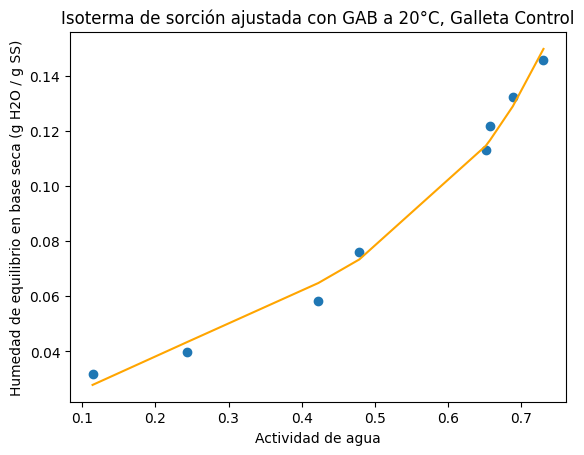

In [42]:
#comprobando el ajuste del modelo de GAB respecto a los datos experimentales

plt.figure()
plt.scatter(tabla_2['aw'],tabla_2["We (g H2O/g SS)"])
plt.plot(tabla_We_GAB['aw'],tabla_We_GAB["We_GAB"], color="orange")
plt.xlabel('Actividad de agua')
plt.ylabel('Humedad de equilibrio en base seca (g H2O / g SS)')
plt.title('Isoterma de sorción ajustada con GAB a 20°C, Galleta Control')
plt.show()
